# Introduction to the Survival Analysis

This is a short introduction to how to use statistical methods with survival analysis with TCGA breast cancer data.


## Methods


> **See Also**: For a more in-depth tour about statistical methods you can visit the following links:


## Data

- For this tutorial we will use two techniques to divide data into training and validation with TCGA data:
    - Bootstrap resampling
    - Cross validation
    -- k-folds
    -- Stratified k-folds
- The data we are going to use is right censored which means not all patients deceased

> For **python** libraries:
> - lifelines


In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

Load data from CSV file with 1083 breast cancer patients from TCGA

In [5]:
df = pd.read_csv('Dataset/BRCA_TCGA_Tutorial.csv')
df.head()

,ID,age,stage,aneuploidy_score,buffa_ hypoxia_score,cancer_type_detailed,Last Communication Contact from Initial Pathologic Diagnosis Date,Birth from Initial Pathologic Diagnosis Date,Disease Free (Months),Disease Free Status,...,T Cells CD4 Memory Resting,T Cells CD4 Naive,T Cells CD8,T Cells Follicular Helper,T Cells gamma delta,T Cells Regulatory Tregs,Lymphocytes,Mast Cells,Dendritic Cells,Macrophages
0,TCGA-A2-A0CO,85,STAGE IIB,8.0,-35.0,Breast Invasive Lobular Carcinoma,3409.0,-31404.0,NaN,NaN,...,0.228185,0.0,0.143303,0.116980,0.0,0.067530,0.717376,0.023990,0.000000,0.258634
1,TCGA-A2-A0CZ,46,STAGE IIA,NaN,-35.0,Breast Invasive Ductal Carcinoma,1616.0,-17026.0,NaN,NaN,...,0.104964,0.0,0.071310,0.040569,0.0,0.014379,0.392783,0.104896,0.000000,0.502320
2,TCGA-A7-A4SF,54,STAGE IIA,22.0,-5.0,Breast Invasive Ductal Carcinoma,545.0,-19985.0,NaN,NaN,...,0.120298,0.0,0.065040,0.061267,0.0,0.067571,0.519102,0.077403,0.000000,0.403495
3,TCGA-A8-A07R,80,STAGE IIIC,13.0,35.0,Breast Invasive Ductal Carcinoma,273.0,-29251.0,NaN,NaN,...,0.042369,0.0,0.036927,0.052592,0.0,0.039751,0.352028,0.002378,0.097752,0.529192
4,TCGA-A8-A07S,73,STAGE IIA,5.0,-25.0,Breast Invasive Carcinoma (NOS),243.0,-26998.0,NaN,NaN,...,0.100324,0.0,0.054141,0.062161,0.0,0.010230,0.275265,0.151477,0.003782,0.569475


In [6]:
# Look at the categorical and numerical variables
summary_categorical = []
for column in df.columns:
  if df[column].dtype == object:
    summary_categorical.append(column)
    print(df[column].value_counts())
    print(f"----------------------------------")

summary_numerical = []
for column in df.columns:
  if df[column].dtype != object:
    print(f"{column} : Minimum: {min((df[column].unique()))}, Maximum: {max((df[column].unique()))} ")
    summary_numerical.append(column)
    print(f"----------------------------------")

TCGA-A2-A0CO    1
TCGA-A7-A26J    1
TCGA-E9-A1RG    1
TCGA-LD-A66U    1
TCGA-A7-A4SE    1
               ..
TCGA-BH-A0BL    1
TCGA-A2-A0ER    1
TCGA-AC-A2FO    1
TCGA-BH-A0BZ    1
TCGA-B6-A0X0    1
Name: ID, Length: 1083, dtype: int64
----------------------------------
STAGE IIA     354
STAGE IIB     255
STAGE IIIA    155
STAGE I        89
STAGE IA       86
STAGE IIIC     64
STAGE IIIB     28
STAGE IV       19
STAGE X        14
STAGE II        6
STAGE IB        6
STAGE III       2
Name: stage, dtype: int64
----------------------------------
Breast Invasive Ductal Carcinoma            779
Breast Invasive Lobular Carcinoma           201
Breast Invasive Carcinoma (NOS)              77
Breast Invasive Mixed Mucinous Carcinoma     17
Metaplastic Breast Cancer                     8
Invasive Breast Carcinoma                     1
Name: cancer_type_detailed, dtype: int64
----------------------------------
0:DiseaseFree            858
1:Recurred/Progressed     84
Name: Disease Free Status, dtyp

In [7]:
# Convert all string categorical variables into integer labels
encoder = LabelEncoder()
for column in df.columns:
  if df[column].dtype == object:
    df[column] = encoder.fit_transform(df[column])

# Kaplan-Meier Estimator

In [8]:
# here to specify which event we will make our study about OS or PFI etc.
event = 'OS'
time = 'OS Time'

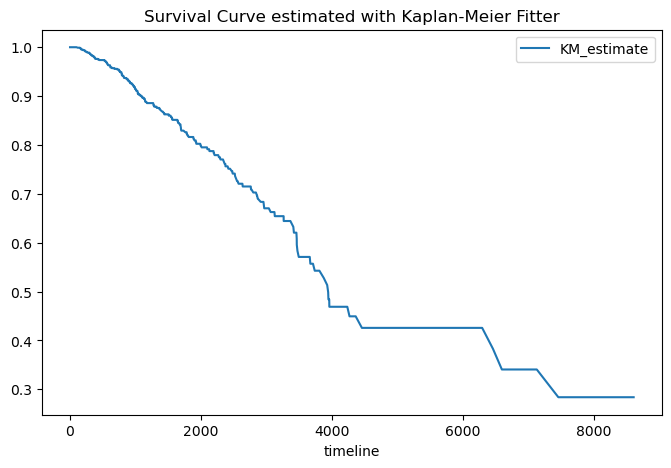

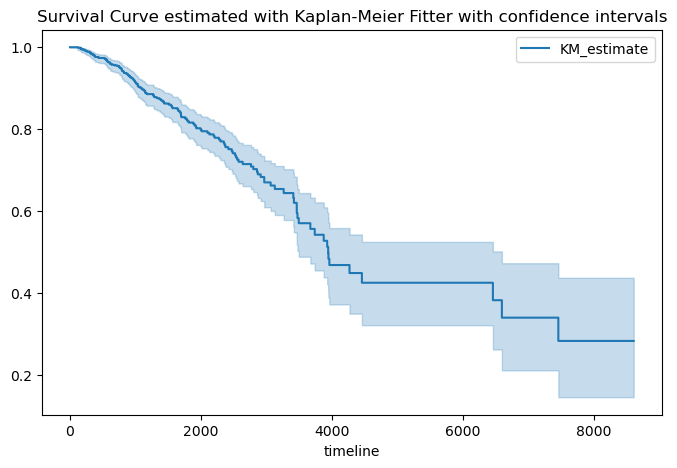

In [37]:
# remove the rows with NaNs
df_surv = df.dropna(subset=[event, time])

kmf = KaplanMeierFitter()
kmf.fit(durations=df_surv[time], event_observed=df_surv[event])

kmf.survival_function_.plot(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

kmf.plot_survival_function(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter with confidence intervals')
plt.show()

In [24]:
# here is to show the KM estimated survival scores based on OS
print(kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
1.0          1.000000
5.0          1.000000
7.0          1.000000
8.0          1.000000
...               ...
7777.0       0.283794
8008.0       0.283794
8391.0       0.283794
8556.0       0.283794
8605.0       0.283794

[823 rows x 1 columns]


## Survival Function of Different Groups

In [31]:
print(df['Immune Subtype'].value_counts())

1    391
0    367
2    190
3     91
4     40
5      4
Name: Immune Subtype, dtype: int64


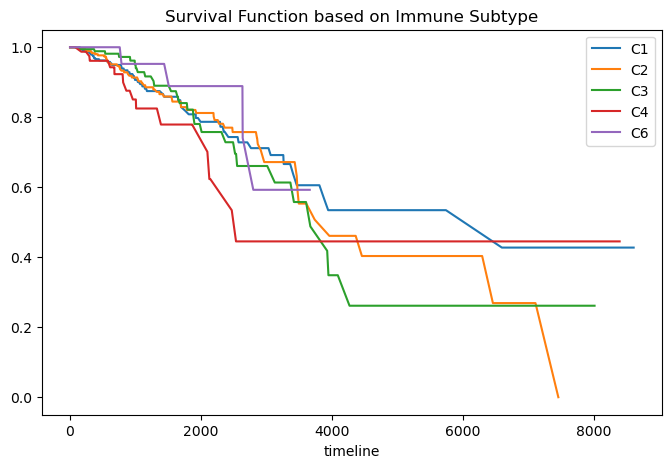

In [32]:
Patient_C1 = (df_surv['Immune Subtype'] == 0)
Patient_C2 = (df_surv['Immune Subtype'] == 1)
Patient_C3 = (df_surv['Immune Subtype'] == 2)
Patient_C4 = (df_surv['Immune Subtype'] == 3)
Patient_C6 = (df_surv['Immune Subtype'] == 4)

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df_surv[Patient_C1]['OS Time'],
        event_observed=df_surv[Patient_C1]['OS'],
        label='C1')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_C2]['OS Time'],
        event_observed=df_surv[Patient_C2]['OS'],
        label='C2')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_C3]['OS Time'],
        event_observed=df_surv[Patient_C3]['OS'],
        label='C3')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_C4]['OS Time'],
        event_observed=df_surv[Patient_C4]['OS'],
        label='C4')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_C6]['OS Time'],
        event_observed=df_surv[Patient_C6]['OS'],
        label='C6')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Immune Subtype')
plt.show();

In [33]:
print(df['TCGA Subtype'].value_counts())

2    505
3    190
0    173
4    139
1     73
5      3
Name: TCGA Subtype, dtype: int64


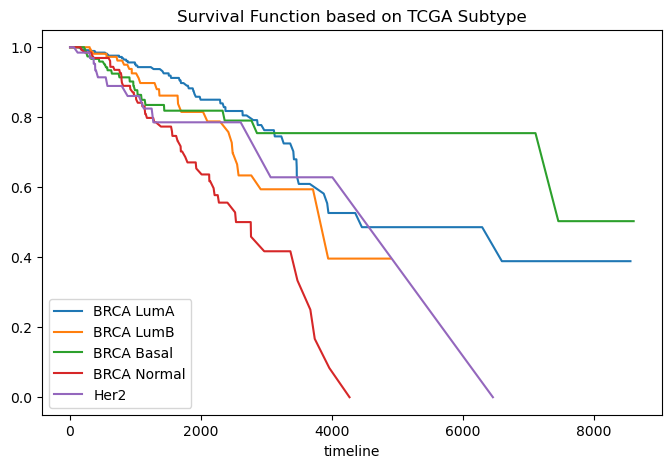

In [69]:
Patient_BRCA_LumA = (df_surv['TCGA Subtype'] == 2)
Patient_BRCA_LumB = (df_surv['TCGA Subtype'] == 3)
Patient_BRCA_Basal = (df_surv['TCGA Subtype'] == 0)
Patient_BRCA_Normal = (df_surv['TCGA Subtype'] == 4)
Patient_Her2 = (df_surv['TCGA Subtype'] == 1)


ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df_surv[Patient_BRCA_LumA]['OS Time'],
        event_observed=df_surv[Patient_BRCA_LumA]['OS'],
        label='BRCA LumA')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_BRCA_LumB]['OS Time'],
        event_observed=df_surv[Patient_BRCA_LumB]['OS'],
        label='BRCA LumB')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_BRCA_Basal]['OS Time'],
        event_observed=df_surv[Patient_BRCA_Basal]['OS'],
        label='BRCA Basal')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_BRCA_Normal]['OS Time'],
        event_observed=df_surv[Patient_BRCA_Normal]['OS'],
        label='BRCA Normal')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_Her2]['OS Time'],
        event_observed=df_surv[Patient_Her2]['OS'],
        label='Her2')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on TCGA Subtype')
plt.show();

The threshold value: 1.307444488


/var/folders/mz/5kmnb9gj5fx4wr_nll5r17mm0000gn/T/ipykernel_31411/1972909136.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kmf.fit(durations=df_surv[Patient_group_1]['OS Time'],
/var/folders/mz/5kmnb9gj5fx4wr_nll5r17mm0000gn/T/ipykernel_31411/1972909136.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  event_observed=df_surv[Patient_group_1]['OS'],
/var/folders/mz/5kmnb9gj5fx4wr_nll5r17mm0000gn/T/ipykernel_31411/1972909136.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kmf.fit(durations=df_surv[Patient_group_2]['OS Time'],
/var/folders/mz/5kmnb9gj5fx4wr_nll5r17mm0000gn/T/ipykernel_31411/1972909136.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  event_observed=df_surv[Patient_group_2]['OS'],


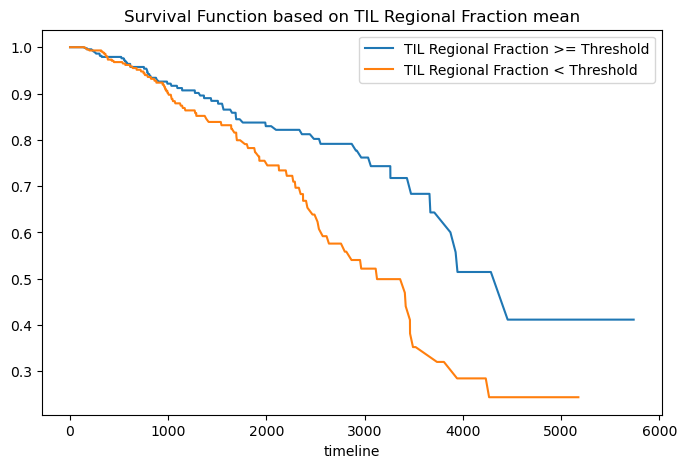

In [74]:
# to do the survival analysis with continuous variable
# select a threshold based on different methods (mean, median, mode etc)
threshold = df_surv['TIL Regional Fraction'].median()
print("The threshold value: {:.9f}".format(threshold))
Patient_group_1 = (df_surv['TIL Regional Fraction'] >= threshold)
Patient_group_2 = (df_surv['TIL Regional Fraction'] < threshold)

# to specify the time maximum range
df_surv = df_surv[df_surv['OS Time']<6000]

ax = plt.subplot()
kmf = KaplanMeierFitter()


kmf.fit(durations=df_surv[Patient_group_1]['OS Time'],
        event_observed=df_surv[Patient_group_1]['OS'],
        label='TIL Regional Fraction >= Threshold')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_group_2]['OS Time'],
        event_observed=df_surv[Patient_group_2]['OS'],
        label='TIL Regional Fraction < Threshold')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

plt.title('Survival Function based on TIL Regional Fraction mean')
plt.show();

## Log-rank Test

In [49]:
results = logrank_test(df_surv[Patient_BRCA_LumA]['OS Time'], df_surv[Patient_Her2]['OS Time'],
                       event_observed_A=df_surv[Patient_BRCA_LumA]['OS'], event_observed_B=df_surv[Patient_Her2]['OS'])

print("p-value:{:.9f}".format(results.p_value))
print("test statistic:{:.2f}".format(results.test_statistic))


p-value:0.035691739
test statistic:4.41


In [50]:
results = logrank_test(df_surv[Patient_BRCA_Basal]['OS Time'], df_surv[Patient_BRCA_Normal]['OS Time'],
                       event_observed_A=df_surv[Patient_BRCA_Basal]['OS'], event_observed_B=df_surv[Patient_BRCA_Normal]['OS'])

print("p-value:{:.9f}".format(results.p_value))
print("test statistic:{:.2f}".format(results.test_statistic))

p-value:0.000638935
test statistic:11.66


## Cox Proportional-Hazards Model

In [ ]:
# Prepare the dataframe for fitting
columns_selected = ['Immune Subtype',
                    'TCGA Subtype',
                    'age',
                    'stage',
                    'Oncotree Code',
                    'tumour_stage',
                    'TIL Regional Fraction' ]
df_surv = df_surv[columns_selected]

In [ ]:
from lifelines import CoxPHFitter

coxph = CoxPHFitter()
coxph.fit(df,
          duration_col='YearsAtCompany',
          event_col='Attrition')

In [ ]:
# Current employees
df_new = df.loc[df['Attrition'] == 0]

# Years at the company of current employees
df_new_obs = df_new['YearsAtCompany']

# Predict survival function for the employes still in the company
predictions = coxph.predict_survival_function(df_new,
                              conditional_after=df_new_obs)
pd.DataFrame(predictions).head(11).iloc[:, :5]

In [ ]:
coxph.print_summary()

In [ ]:
coxph.plot()

# 1. Bootstrap Resampling

### 1.1 Basics of survival analysis

### 1.2 Kaplan-Meier

### 1.3 Log-Rank Test

### 1.4 Cox Regression

# Crossvalidation (K-Folds)

# Cross-validation (Stratified k-folds)